In [40]:
import pandas as pd
import numpy as np

In [47]:
experiments = 4
epochs = 40

activations = ['sigmoid', 'tanh', 'relu', 'linear', 'elu', 'selu', 'softplus', 'softsign', 'hard_sigmoid', 'LeakyReLU', 'ThresholdedReLU']
# activations = ['elu']
optimizers = ['rmsp', 'adam', 'sgd', 'Adagrad', 'Adadelta', 'Adamax', 'Nadam']
# optimizers = ['rmsp', 'adam', 'sgd', 'Adagrad', 'Adadelta', 'Adamax']
# colors = ['b', 'g', 'k', 'y', 'm', 'r', 'c']
colors = ['#000000', '#330000', '#660000', '#990000', '#CC0000', '#FF0000',
          '#003300', '#006600', '#009900', '#00CC00', '#00FF00',
          '#000033', '#000066', '#000099', '#0000CC', '#0000FF',
          '#033000', '#066000', '#099000', '#0CC000', '#0FF000',
          '#000330', '#000660', '#000990', '#000CC0', '#000FF0']
lines = ['-', '--', ':', '-.']
cols_f = []
for c in colors:
    for l in lines:
        cols_f.append(c+l)
        

columns=['epoch', 'acc', 'loss', 'val_acc', 'val_loss']
data = []

i = 0
for act in activations:
    for opt in optimizers:
        item_data = []
        
        data.append({
            'name': '',
            'disp_name': act + '_' + opt,
            'col': colors[i % len(colors)],
            'line': lines[i % len(lines)],
            'act': act,
            'opt':opt,
#             'data' : [pd.read_csv('./logs/done/mnist_cnn_' + act +'_' + opt + '_' + str(epochs) + '_' + str(ex)  + '_fd_64.csv', sep=';') for ex in range(experiments)],
            'data' : [pd.read_csv('./logs/done/mnist_cnn_' + act +'_' + opt + '_' + str(epochs) + '_' + str(ex)  + '_64.csv', sep=';') for ex in range(experiments)],
            'averaged': pd.DataFrame(columns=['epoch', 'acc', 'loss', 'val_acc', 'val_loss']),
            'best': {
                'max_acc':0,
                'max_acc_epoch':0,
                'min_loss':0,
                'min_loss_epoch':0,
                'max_val_acc':0,
                'max_val_acc_epoch':0,
                'min_val_loss':0,
                'min_val_loss_epoch':0
            }
        })
        i+=1

max_epoch = 0
        

In [48]:
check = pd.DataFrame(columns=['config', 'exp', 'acc', 'loss', 'val_acc', 'val_loss', 'opt', 'act'])
i=0
for d in range(len(data)):
    for experiment in range(experiments):
        check.loc[i] = [data[d]['disp_name'], 
                          experiment,
                          data[d]['data'][experiment]['acc'].tolist()[-1], 
                          data[d]['data'][experiment]['loss'].tolist()[-1], 
                          data[d]['data'][experiment]['val_acc'].tolist()[-1], 
                          data[d]['data'][experiment]['val_loss'].tolist()[-1], 
                          data[d]['opt'], 
                          data[d]['act']]
        i+=1


In [49]:
check = check.sort_values(by=['val_acc'])
check

,config,exp,acc,loss,val_acc,val_loss,opt,act
182,softplus_Adagrad,2,0.090350,14.661825,0.0892,14.680361,Adagrad,softplus
180,softplus_Adagrad,0,0.097367,14.548733,0.0982,14.535301,Adagrad,softplus
15,sigmoid_Adagrad,3,0.099150,14.519986,0.1009,14.491779,Adagrad,sigmoid
238,hard_sigmoid_Adagrad,2,0.102183,14.471095,0.1010,14.490167,Adagrad,hard_sigmoid
237,hard_sigmoid_Adagrad,1,0.104417,14.435101,0.1028,14.461158,Adagrad,hard_sigmoid
246,hard_sigmoid_Adamax,2,0.112367,2.301159,0.1135,2.301020,Adamax,hard_sigmoid
245,hard_sigmoid_Adamax,1,0.112367,2.301160,0.1135,2.301014,Adamax,hard_sigmoid
236,hard_sigmoid_Adagrad,0,0.112367,2.301161,0.1135,2.301026,Adagrad,hard_sigmoid
14,sigmoid_Adagrad,2,0.112367,14.306962,0.1135,14.288695,Adagrad,sigmoid
249,hard_sigmoid_Nadam,1,0.112367,2.301159,0.1135,2.301020,Nadam,hard_sigmoid


In [50]:
check = check.sort_values(by=['val_acc'])
check

,config,exp,acc,loss,val_acc,val_loss,opt,act
182,softplus_Adagrad,2,0.090350,14.661825,0.0892,14.680361,Adagrad,softplus
180,softplus_Adagrad,0,0.097367,14.548733,0.0982,14.535301,Adagrad,softplus
15,sigmoid_Adagrad,3,0.099150,14.519986,0.1009,14.491779,Adagrad,sigmoid
238,hard_sigmoid_Adagrad,2,0.102183,14.471095,0.1010,14.490167,Adagrad,hard_sigmoid
237,hard_sigmoid_Adagrad,1,0.104417,14.435101,0.1028,14.461158,Adagrad,hard_sigmoid
183,softplus_Adagrad,3,0.112367,14.306959,0.1135,14.288692,Adagrad,softplus
249,hard_sigmoid_Nadam,1,0.112367,2.301159,0.1135,2.301020,Nadam,hard_sigmoid
14,sigmoid_Adagrad,2,0.112367,14.306962,0.1135,14.288695,Adagrad,sigmoid
245,hard_sigmoid_Adamax,1,0.112367,2.301160,0.1135,2.301014,Adamax,hard_sigmoid
246,hard_sigmoid_Adamax,2,0.112367,2.301159,0.1135,2.301020,Adamax,hard_sigmoid


In [51]:
for d in range(len(data)):
    max_acc = 0 
    max_val_acc = 0
    min_loss = 100
    min_val_loss = 100
    val_acc_diff = 0.
    
    min_val_acc_diff_10 = 1.
    min_val_acc_diff_epoch = 0
    
    has_hit = False

    for epoch in range(epochs):
        acc = []
        loss = []
        val_acc = []
        val_loss = []
        val_acc_diffs = []
        
        for experiment in range(experiments):
            acc.append(data[d]['data'][experiment].iloc[epoch]['acc'])
            loss.append(data[d]['data'][experiment].iloc[epoch]['loss'])
            val_acc.append(data[d]['data'][experiment].iloc[epoch]['val_acc'])
            val_loss.append(data[d]['data'][experiment].iloc[epoch]['val_loss'])
            if epoch > 0:
                val_acc_diffs.append(data[d]['data'][experiment].iloc[epoch]['val_acc'] - data[d]['data'][experiment].iloc[epoch-1]['val_acc'])
            else:
                val_acc_diffs.append(0)
        
        av_acc = sum(acc)/len(acc)
        av_loss = sum(loss)/len(loss)
        av_val_acc = sum(val_acc)/len(val_acc)
        av_val_loss = sum(val_loss)/len(val_loss)
        av_val_acc_diffs = sum(val_acc_diffs)/len(val_acc_diffs)
        std = np.std(val_acc)

        if(av_acc > max_acc):
            max_acc = av_acc
            data[d]['best']['max_acc'] = max_acc
            data[d]['best']['max_acc_epoch'] = epoch
        
#         if(av_val_acc > max_val_acc):
#             max_val_acc = av_val_acc
#             data[d]['best']['max_val_acc'] = max_acc
#             data[d]['best']['max_val_acc_epoch'] = epoch+1
        
        if(av_loss < min_loss):
            min_loss = av_loss
            data[d]['best']['min_loss'] = min_loss
            data[d]['best']['min_loss_epoch'] = epoch
        
        if(av_val_loss < min_val_loss):
            min_val_loss = av_val_loss
            data[d]['best']['min_val_loss'] = min_val_loss
            data[d]['best']['min_val_loss_epoch'] = epoch
        
        
        
        data[d]['averaged'] = data[d]['averaged'].append({
            'epoch': epoch,
            'acc': (av_acc),
            'loss': (av_loss),
            'val_acc': (av_val_acc),
            'val_loss': (av_val_loss),
            'val_acc_diff' : av_val_acc_diffs,
            'val_acc_std': std}, ignore_index=True)
        
        if epoch>5:
            av_val_acc_diff_10 = np.mean(np.absolute(data[d]['averaged'].iloc[epoch-6:epoch]['val_acc_diff'].values))
            
            if av_val_acc_diff_10 < 0.00005 and av_val_acc > max_val_acc:
                max_val_acc = av_val_acc
                data[d]['best']['max_val_acc'] = max_acc
                data[d]['best']['max_val_acc_epoch'] = epoch
                has_hit = True
#                 print('Config: ' + data[d]['disp_name'] + ', epoch: ' + str(epoch) + ', val_acc: '+ str(av_val_acc) +', diff: ' + str(av_val_acc_diffs) + ', av_diff: ' + str(av_val_acc_diff_10) + ' HIT!')
#             else:
#                 print('Config: ' + data[d]['disp_name'] + ', epoch: ' + str(epoch) + ', val_acc: '+ str(av_val_acc) +', diff: ' + str(av_val_acc_diffs) + ', av_diff: ' + str(av_val_acc_diff_10))
    if not has_hit:
        data[d]['best']['max_val_acc'] = data[d]['averaged'].iloc[epochs-1]['val_acc']
        data[d]['best']['max_val_acc_epoch'] = epochs
        print('Config: ' + data[d]['disp_name'] + ' had no hits, max val_acc: '+ str(data[d]['best']['max_val_acc']) +' at epoch ' + str(data[d]['best']['max_val_acc_epoch']))
    else:
        print('Config: ' + data[d]['disp_name'] + ' HAD HITS, max val_acc: '+ str(data[d]['best']['max_val_acc']) +' at epoch ' + str(data[d]['best']['max_val_acc_epoch']))

Config: sigmoid_rmsp had no hits, max val_acc: 0.986375 at epoch 40
Config: sigmoid_adam HAD HITS, max val_acc: 0.9946124999999999 at epoch 36
Config: sigmoid_sgd had no hits, max val_acc: 0.94365 at epoch 40
Config: sigmoid_Adagrad had no hits, max val_acc: 0.537575 at epoch 40
Config: sigmoid_Adadelta had no hits, max val_acc: 0.985825 at epoch 40
Config: sigmoid_Adamax had no hits, max val_acc: 0.98695 at epoch 40
Config: sigmoid_Nadam HAD HITS, max val_acc: 0.9959416666666667 at epoch 35
Config: tanh_rmsp HAD HITS, max val_acc: 0.9992041666665833 at epoch 33
Config: tanh_adam HAD HITS, max val_acc: 0.9990125000000832 at epoch 35
Config: tanh_sgd had no hits, max val_acc: 0.9843249999999999 at epoch 40
Config: tanh_Adagrad HAD HITS, max val_acc: 0.9949958333334166 at epoch 26
Config: tanh_Adadelta HAD HITS, max val_acc: 0.9984458333334167 at epoch 31
Config: tanh_Adamax HAD HITS, max val_acc: 0.9988541666666667 at epoch 35
Config: tanh_Nadam HAD HITS, max val_acc: 0.9990916666665834

In [52]:
results = pd.DataFrame(columns=['config', 'acc', 'loss', 'val_acc','val_acc_std', 'val_loss', 'opt', 'act', 'max_acc_epoch', 'max_val_acc_epoch', 'min_loss_epoch', 'min_val_loss_epoch'])
i=0
for d in data:
    results.loc[i] = [d['disp_name'], 
                      d['averaged']['acc'].tolist()[-1], 
                      d['averaged']['loss'].tolist()[-1], 
                      d['averaged']['val_acc'].tolist()[-1], 
                      d['averaged']['val_acc_std'].tolist()[-1],
                      d['averaged']['val_loss'].tolist()[-1], 
                      d['opt'], 
                      d['act'],
                      d['best']['max_acc_epoch'],
                     d['best']['max_val_acc_epoch'],
                     d['best']['min_loss_epoch'],
                     d['best']['min_val_loss_epoch'],]
    i+=1
    
    
    

In [53]:
results

,config,acc,loss,val_acc,val_acc_std,val_loss,opt,act,max_acc_epoch,max_val_acc_epoch,min_loss_epoch,min_val_loss_epoch
0,sigmoid_rmsp,0.989504,0.036226,0.986375,0.000832,0.043271,rmsp,sigmoid,35,40,39,36
1,sigmoid_adam,0.994538,0.018075,0.986925,0.000606,0.044469,adam,sigmoid,37,36,34,27
2,sigmoid_sgd,0.935292,0.222223,0.943650,0.001534,0.200792,sgd,sigmoid,39,40,39,38
3,sigmoid_Adagrad,0.533983,7.271221,0.537575,0.430398,7.249660,Adagrad,sigmoid,38,40,39,39
4,sigmoid_Adadelta,0.988563,0.037583,0.985825,0.000377,0.044168,Adadelta,sigmoid,35,40,35,36
5,sigmoid_Adamax,0.992583,0.024763,0.986950,0.000594,0.042838,Adamax,sigmoid,34,40,39,39
6,sigmoid_Nadam,0.996004,0.013112,0.986775,0.000554,0.048736,Nadam,sigmoid,36,35,36,19
7,tanh_rmsp,0.999179,0.003273,0.985625,0.000426,0.076299,rmsp,tanh,28,33,39,4
8,tanh_adam,0.998787,0.004376,0.985050,0.000844,0.068818,adam,tanh,32,35,32,2
9,tanh_sgd,0.987746,0.042637,0.984325,0.000455,0.048175,sgd,tanh,39,40,39,37


In [54]:
%matplotlib inline
import matplotlib.pyplot as plt
def get_cmap(n, name='hsv'):
    '''Returns a function that maps each index in 0, 1, ..., n-1 to a distinct 
    RGB color; the keyword argument name must be a standard mpl colormap name.'''
    return plt.cm.get_cmap(name, n)

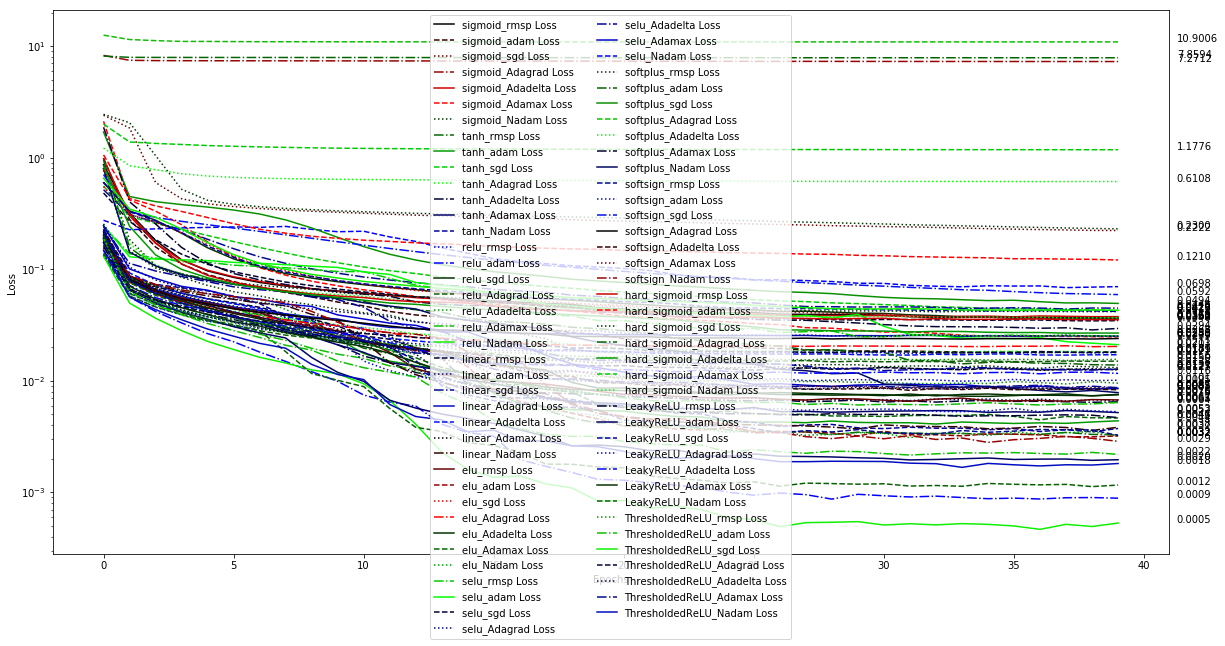

In [55]:
plt.figure(figsize=(20,10))
cmap = get_cmap(experiments * 2)
for d in data:
    plt.plot(range(epochs),
             d['averaged']['loss'].tolist(),
             d['col'],
             linestyle=d['line'],
             label=d['disp_name'] + ' Loss')
    plt.annotate('%0.4f' % d['averaged']['loss'].tolist()[-1], xy=(1, d['averaged']['loss'].tolist()[-1]), xytext=(8, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.yscale('log')
plt.legend(loc='upper center',ncol=2)

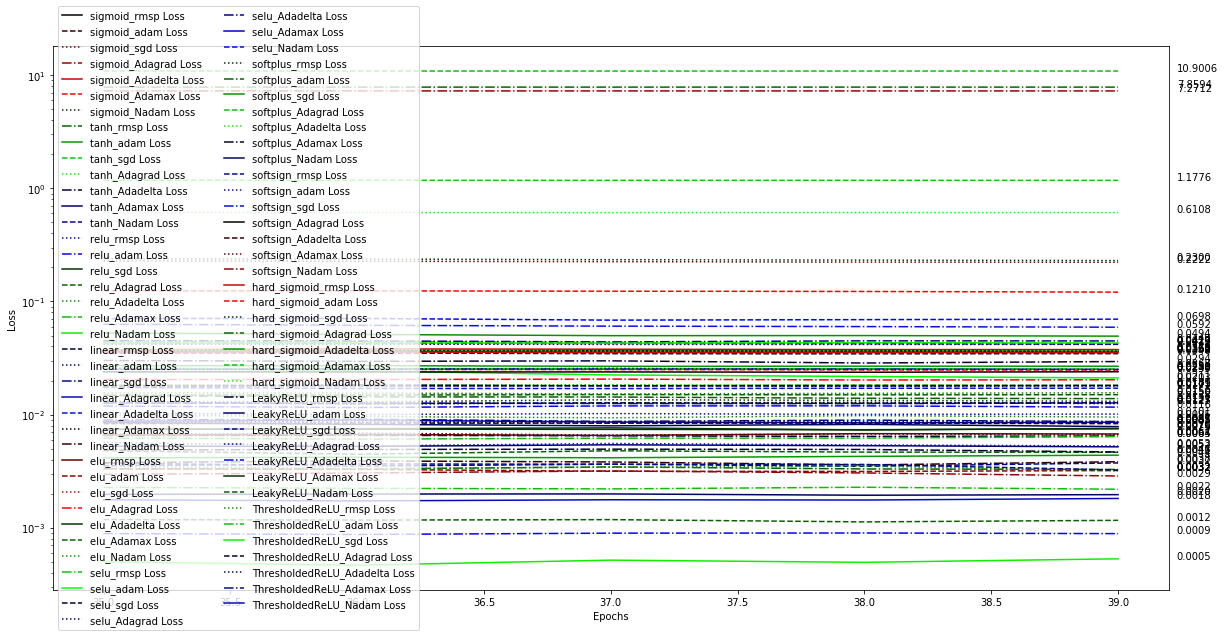

In [56]:
plt.figure(figsize=(20,10))
cmap = get_cmap(experiments * 2)
for d in data:
    plt.plot(range(epochs-5,epochs),
             d['averaged']['loss'].tolist()[epochs-5:],
             d['col'],
             linestyle=d['line'],
             label=d['disp_name'] + ' Loss')
    plt.annotate('%0.4f' % d['averaged']['loss'].tolist()[-1], xy=(1, d['averaged']['loss'].tolist()[-1]), xytext=(8, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.yscale('log')
plt.legend(loc='center left',ncol=2)

In [57]:
sorted_by_loss = results.sort_values(by=['loss'])
sorted_by_loss

,config,acc,loss,val_acc,val_acc_std,val_loss,opt,act,max_acc_epoch,max_val_acc_epoch,min_loss_epoch,min_val_loss_epoch
20,relu_Nadam,0.999933,0.000531,0.991150,0.000482,0.052207,Nadam,relu,26,32,36,2
15,relu_adam,0.999837,0.000886,0.990400,0.000552,0.046700,adam,relu,28,34,28,3
69,LeakyReLU_Nadam,0.999846,0.001161,0.988100,0.000515,0.056872,Nadam,LeakyReLU,31,34,38,2
76,ThresholdedReLU_Nadam,0.999492,0.001813,0.990750,0.000665,0.044810,Nadam,ThresholdedReLU,33,36,33,5
64,LeakyReLU_adam,0.999638,0.001959,0.988450,0.000541,0.052635,adam,LeakyReLU,35,39,38,3
71,ThresholdedReLU_adam,0.999433,0.002188,0.990775,0.000715,0.042637,adam,ThresholdedReLU,30,38,31,5
55,softsign_Nadam,0.999296,0.002865,0.984900,0.000583,0.086729,Nadam,softsign,34,39,34,3
34,elu_Nadam,0.999117,0.003187,0.985000,0.000604,0.081941,Nadam,elu,39,33,31,1
29,elu_adam,0.999104,0.003201,0.986325,0.000370,0.069752,adam,elu,38,37,38,2
49,softsign_rmsp,0.999192,0.003239,0.986175,0.000130,0.064998,rmsp,softsign,32,37,39,4


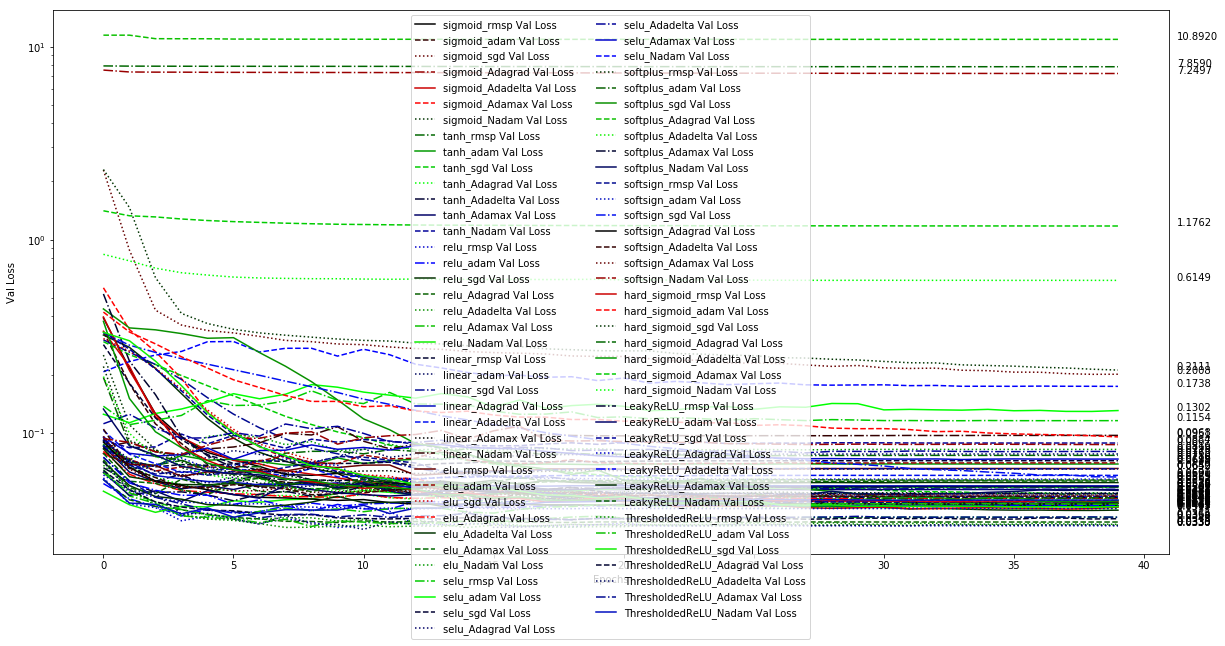

In [58]:
plt.figure(figsize=(20,10))
cmap = get_cmap(experiments * 2)
for d in data:
    plt.plot(range(epochs),
             d['averaged']['val_loss'].tolist(),
             d['col'],
             linestyle=d['line'],
             label=d['disp_name'] + ' Val Loss')
    plt.annotate('%0.4f' % d['averaged']['val_loss'].tolist()[-1], xy=(1, d['averaged']['val_loss'].tolist()[-1]), xytext=(8, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points')
plt.xlabel('Epochs')
plt.ylabel('Val Loss')
plt.yscale('log')
plt.legend(loc='upper center',ncol=2)

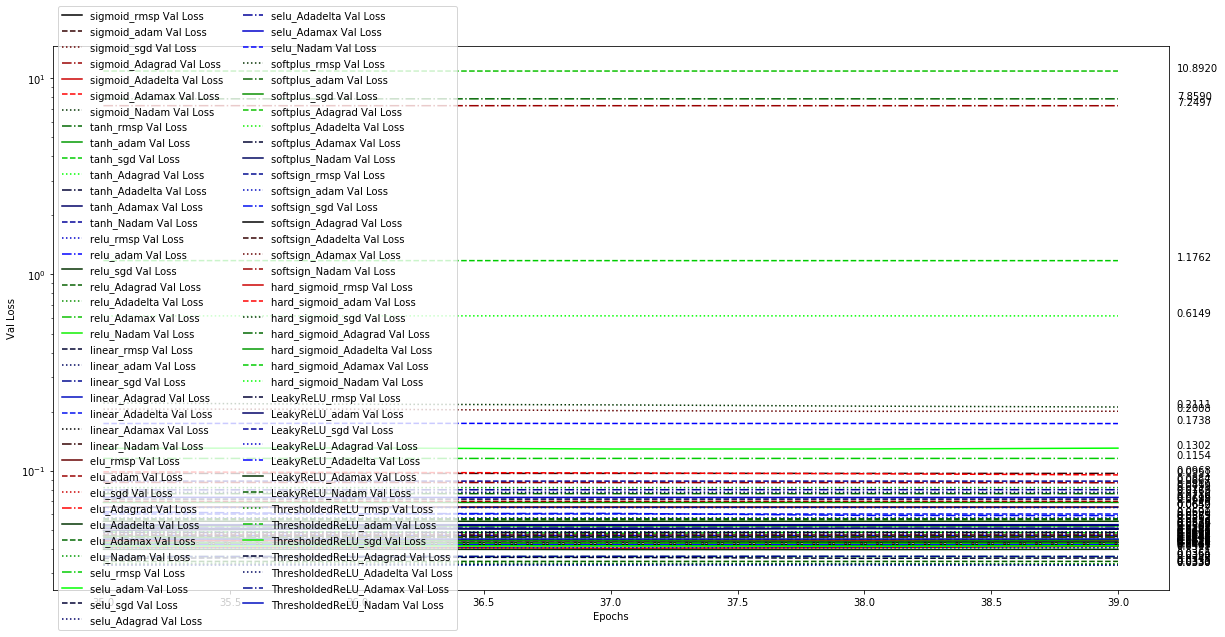

In [59]:
plt.figure(figsize=(20,10))
cmap = get_cmap(experiments * 2)
for d in data:
    plt.plot(range(epochs-5,epochs),
             d['averaged']['val_loss'].tolist()[epochs-5:],
             d['col'],
             linestyle=d['line'],
             label=d['disp_name'] + ' Val Loss')
    plt.annotate('%0.4f' % d['averaged']['val_loss'].tolist()[-1], xy=(1, d['averaged']['val_loss'].tolist()[-1]), xytext=(8, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points')
plt.xlabel('Epochs')
plt.ylabel('Val Loss')
plt.yscale('log')
plt.legend(loc='center left',ncol=2)

In [60]:
sorted_by_val_loss = results.sort_values(by=['val_loss'])
sorted_by_val_loss

,config,acc,loss,val_acc,val_acc_std,val_loss,opt,act,max_acc_epoch,max_val_acc_epoch,min_loss_epoch,min_val_loss_epoch
14,relu_rmsp,0.997125,0.010104,0.991250,0.000304,0.032955,rmsp,relu,27,31,33,9
74,ThresholdedReLU_Adadelta,0.997650,0.008512,0.990100,0.000430,0.033021,Adadelta,ThresholdedReLU,37,40,37,10
18,relu_Adadelta,0.997529,0.009510,0.990550,0.000456,0.033258,Adadelta,relu,36,38,37,7
70,ThresholdedReLU_rmsp,0.995667,0.015591,0.990125,0.000432,0.033543,rmsp,ThresholdedReLU,34,35,37,14
17,relu_Adagrad,0.995775,0.014991,0.989125,0.000497,0.034462,Adagrad,relu,30,30,30,18
73,ThresholdedReLU_Adagrad,0.994725,0.018097,0.988975,0.000750,0.035846,Adagrad,ThresholdedReLU,35,38,33,18
19,relu_Adamax,0.998296,0.006381,0.989775,0.000349,0.036449,Adamax,relu,27,33,36,8
75,ThresholdedReLU_Adamax,0.997546,0.008671,0.989300,0.000539,0.036512,Adamax,ThresholdedReLU,31,40,39,18
16,relu_sgd,0.989021,0.036274,0.987025,0.000482,0.039697,sgd,relu,38,40,37,38
46,softplus_Adadelta,0.989079,0.036778,0.987375,0.000960,0.040344,Adadelta,softplus,37,40,37,35


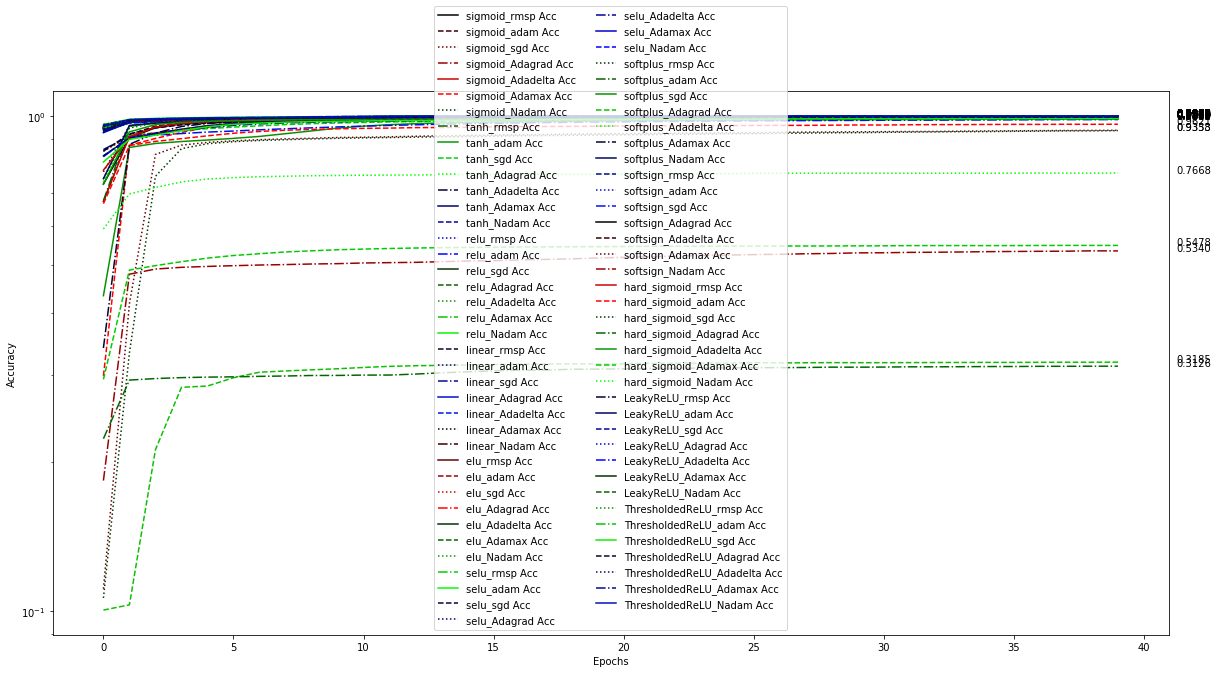

In [61]:
plt.figure(figsize=(20,10))
cmap = get_cmap(experiments * 2)

for d in data:
    plt.plot(range(epochs),
             d['averaged']['acc'].tolist(),
             d['col'],
             linestyle=d['line'],
             label=d['disp_name'] + ' Acc')
    plt.annotate('%0.4f' % d['averaged']['acc'].tolist()[-1], xy=(1, d['averaged']['acc'].tolist()[-1]), xytext=(8, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.yscale('log')
plt.legend(loc='lower center',ncol=2)

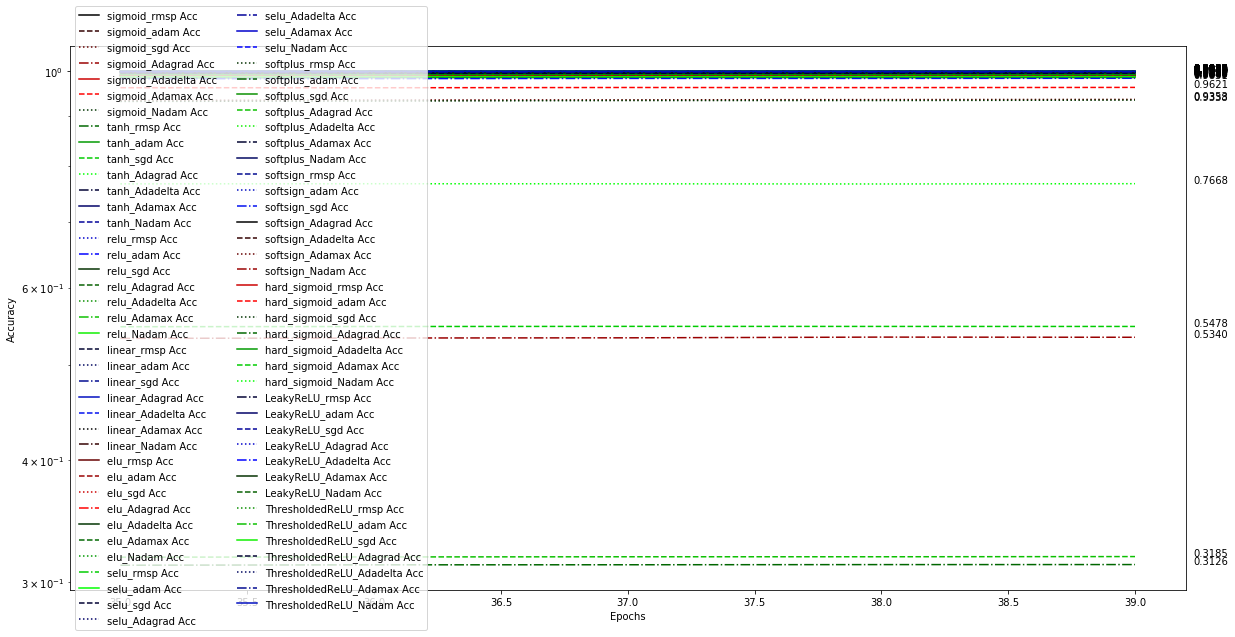

In [62]:
plt.figure(figsize=(20,10))
cmap = get_cmap(experiments * 2)

for d in data:
    plt.plot(range(epochs-5,epochs),
             d['averaged']['acc'].tolist()[epochs-5:],
             d['col'],
             linestyle=d['line'],
             label=d['disp_name'] + ' Acc')
    plt.annotate('%0.4f' % d['averaged']['acc'].tolist()[-1], xy=(1, d['averaged']['acc'].tolist()[-1]), xytext=(8, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.yscale('log')
plt.legend(loc='center left',ncol=2)

In [63]:
sorted_by_acc = results.sort_values(by=['acc'], ascending=False)
sorted_by_acc

,config,acc,loss,val_acc,val_acc_std,val_loss,opt,act,max_acc_epoch,max_val_acc_epoch,min_loss_epoch,min_val_loss_epoch
20,relu_Nadam,0.999933,0.000531,0.991150,0.000482,0.052207,Nadam,relu,26,32,36,2
69,LeakyReLU_Nadam,0.999846,0.001161,0.988100,0.000515,0.056872,Nadam,LeakyReLU,31,34,38,2
15,relu_adam,0.999837,0.000886,0.990400,0.000552,0.046700,adam,relu,28,34,28,3
64,LeakyReLU_adam,0.999638,0.001959,0.988450,0.000541,0.052635,adam,LeakyReLU,35,39,38,3
76,ThresholdedReLU_Nadam,0.999492,0.001813,0.990750,0.000665,0.044810,Nadam,ThresholdedReLU,33,36,33,5
71,ThresholdedReLU_adam,0.999433,0.002188,0.990775,0.000715,0.042637,adam,ThresholdedReLU,30,38,31,5
55,softsign_Nadam,0.999296,0.002865,0.984900,0.000583,0.086729,Nadam,softsign,34,39,34,3
49,softsign_rmsp,0.999192,0.003239,0.986175,0.000130,0.064998,rmsp,softsign,32,37,39,4
7,tanh_rmsp,0.999179,0.003273,0.985625,0.000426,0.076299,rmsp,tanh,28,33,39,4
34,elu_Nadam,0.999117,0.003187,0.985000,0.000604,0.081941,Nadam,elu,39,33,31,1


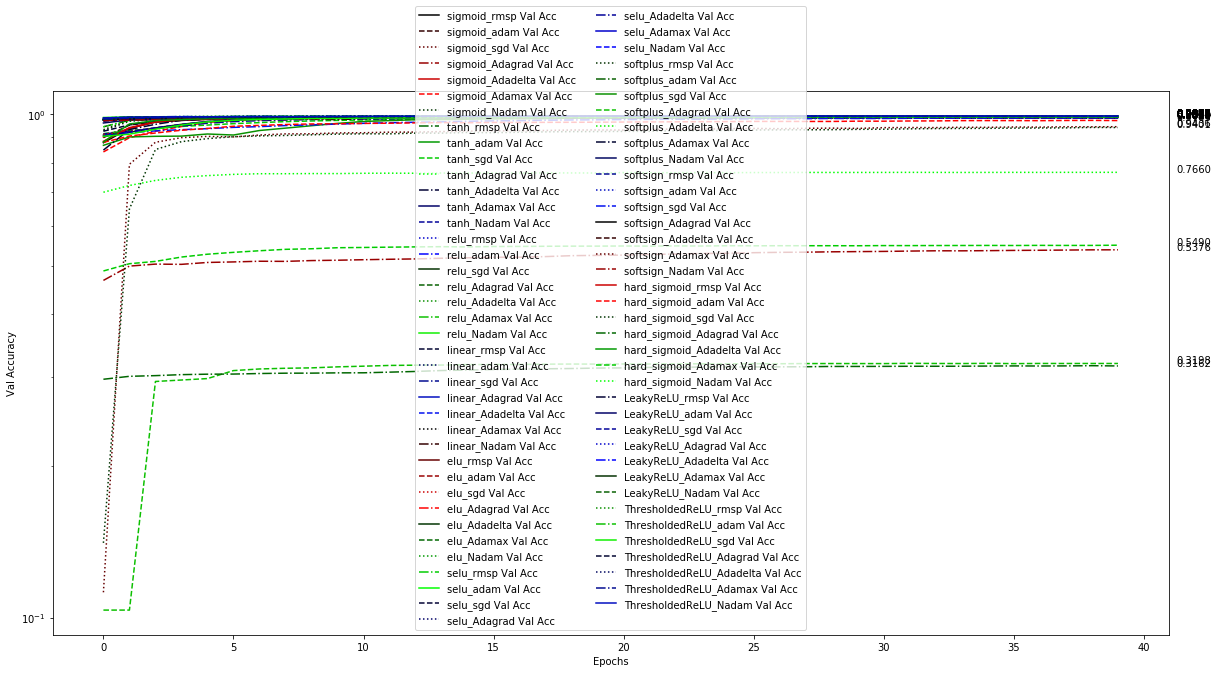

In [64]:
plt.figure(figsize=(20,10))
cmap = get_cmap(experiments * 2)

for d in data:
    plt.plot(range(epochs),
             d['averaged']['val_acc'].tolist(),
             d['col'],
             linestyle=d['line'],
             label=d['disp_name'] + ' Val Acc')
    plt.annotate('%0.4f' % d['averaged']['val_acc'].tolist()[-1], xy=(1, d['averaged']['val_acc'].tolist()[-1]), xytext=(8, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points')
plt.xlabel('Epochs')
plt.ylabel('Val Accuracy')
plt.yscale('log')
plt.legend(loc='lower center',ncol=2)

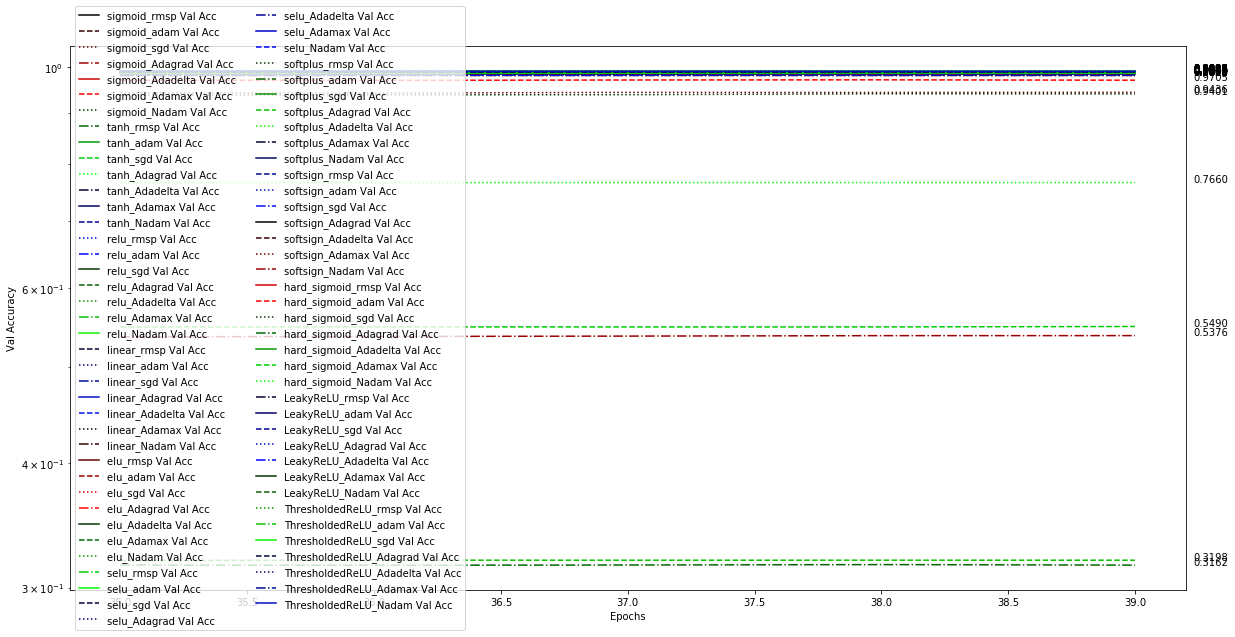

In [65]:
plt.figure(figsize=(20,10))
cmap = get_cmap(experiments * 2)

for d in data:
    plt.plot(range(epochs-5,epochs),
             d['averaged']['val_acc'].tolist()[epochs-5:],
             d['col'],
             linestyle=d['line'],
             label=d['disp_name'] + ' Val Acc')
    plt.annotate('%0.4f' % d['averaged']['val_acc'].tolist()[-1], xy=(1, d['averaged']['val_acc'].tolist()[-1]), xytext=(8, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points')
plt.xlabel('Epochs')
plt.ylabel('Val Accuracy')
plt.yscale('log')
plt.legend(loc='center left',ncol=2)

In [66]:
sorted_by_val_acc = results.sort_values(by=['val_acc'], ascending=False)
sorted_by_val_acc

,config,acc,loss,val_acc,val_acc_std,val_loss,opt,act,max_acc_epoch,max_val_acc_epoch,min_loss_epoch,min_val_loss_epoch
14,relu_rmsp,0.997125,0.010104,0.991250,0.000304,0.032955,rmsp,relu,27,31,33,9
20,relu_Nadam,0.999933,0.000531,0.991150,0.000482,0.052207,Nadam,relu,26,32,36,2
71,ThresholdedReLU_adam,0.999433,0.002188,0.990775,0.000715,0.042637,adam,ThresholdedReLU,30,38,31,5
76,ThresholdedReLU_Nadam,0.999492,0.001813,0.990750,0.000665,0.044810,Nadam,ThresholdedReLU,33,36,33,5
18,relu_Adadelta,0.997529,0.009510,0.990550,0.000456,0.033258,Adadelta,relu,36,38,37,7
15,relu_adam,0.999837,0.000886,0.990400,0.000552,0.046700,adam,relu,28,34,28,3
70,ThresholdedReLU_rmsp,0.995667,0.015591,0.990125,0.000432,0.033543,rmsp,ThresholdedReLU,34,35,37,14
74,ThresholdedReLU_Adadelta,0.997650,0.008512,0.990100,0.000430,0.033021,Adadelta,ThresholdedReLU,37,40,37,10
19,relu_Adamax,0.998296,0.006381,0.989775,0.000349,0.036449,Adamax,relu,27,33,36,8
75,ThresholdedReLU_Adamax,0.997546,0.008671,0.989300,0.000539,0.036512,Adamax,ThresholdedReLU,31,40,39,18


In [67]:
print('---Top by Accuracy---')
print(sorted_by_acc.head())
print('\n---Top by Val Accuracy---')
print(sorted_by_val_acc.head())
print('\n---Top by Loss---')
print(sorted_by_loss.head())
print('\n---Top by Val Loss---')
print(sorted_by_val_loss.head())

---Top by Accuracy---
                   config       acc      loss  val_acc  val_acc_std  val_loss  \
20             relu_Nadam  0.999933  0.000531  0.99115     0.000482  0.052207   
69        LeakyReLU_Nadam  0.999846  0.001161  0.98810     0.000515  0.056872   
15              relu_adam  0.999837  0.000886  0.99040     0.000552  0.046700   
64         LeakyReLU_adam  0.999638  0.001959  0.98845     0.000541  0.052635   
76  ThresholdedReLU_Nadam  0.999492  0.001813  0.99075     0.000665  0.044810   

      opt              act max_acc_epoch max_val_acc_epoch min_loss_epoch  \
20  Nadam             relu            26                32             36   
69  Nadam        LeakyReLU            31                34             38   
15   adam             relu            28                34             28   
64   adam        LeakyReLU            35                39             38   
76  Nadam  ThresholdedReLU            33                36             33   

   min_val_loss_epoch  
20  

In [70]:
results['acc_score'] = (results['acc'] - results['acc'].min()) / (results['acc'].max() - results['acc'].min())
results['val_acc_score'] = (results['val_acc'] - results['val_acc'].min()) / (results['val_acc'].max() - results['val_acc'].min())
results['loss_score'] = 1 - (results['loss'] - results['loss'].min()) / (results['loss'].max() - results['loss'].min())
results['val_loss_score'] = 1 - (results['val_loss'] - results['val_loss'].min()) / (results['val_loss'].max() - results['val_loss'].min())
results['val_acc_epoch_score'] = 1 - (results['max_val_acc_epoch'] - results['max_val_acc_epoch'].min()) / (results['max_val_acc_epoch'].max() - results['max_val_acc_epoch'].min())
results['total_score'] = results['acc_score'] * 0.5 + results['loss_score'] * 0.1 + results['val_acc_score'] + results['val_loss_score'] * 0.2 + results['val_acc_epoch_score'] * 0.3
results['total_score_norm'] = (results['total_score'] - results['total_score'].min()) / (results['total_score'].max() - results['total_score'].min())

In [71]:
sorted_by_score = results.sort_values(by=['total_score_norm'], ascending=False)
sorted_by_score.reset_index()

,index,config,acc,loss,val_acc,val_acc_std,val_loss,opt,act,max_acc_epoch,max_val_acc_epoch,min_loss_epoch,min_val_loss_epoch,acc_score,val_acc_score,loss_score,val_loss_score,val_acc_epoch_score,total_score,total_score_norm
0,66,LeakyReLU_Adagrad,0.995175,0.017906,0.987450,0.000357,0.040477,Adagrad,LeakyReLU,39,25,31,12,0.993078,0.994371,0.998406,0.999307,1,2.09061,1
1,10,tanh_Adagrad,0.995079,0.018123,0.986025,0.000109,0.045404,Adagrad,tanh,33,26,32,12,0.992938,0.992260,0.998386,0.998854,0.933333,2.06834,0.989297
2,67,LeakyReLU_Adadelta,0.996838,0.011636,0.988025,0.000630,0.042009,Adadelta,LeakyReLU,36,27,36,16,0.995496,0.995223,0.998981,0.999166,0.866667,2.0527,0.981783
3,68,LeakyReLU_Adamax,0.998092,0.007485,0.988450,0.000522,0.042999,Adamax,LeakyReLU,38,29,32,6,0.997321,0.995852,0.999362,0.999075,0.733333,2.01426,0.963311
4,31,elu_Adagrad,0.994125,0.020318,0.985975,0.000466,0.045714,Adagrad,elu,22,29,38,18,0.991550,0.992186,0.998185,0.998825,0.733333,2.00754,0.960082
5,17,relu_Adagrad,0.995775,0.014991,0.989125,0.000497,0.034462,Adagrad,relu,30,30,30,18,0.993950,0.996852,0.998673,0.999861,0.666667,1.99367,0.953413
6,50,softsign_adam,0.998767,0.005279,0.986400,0.000552,0.057466,adam,softsign,39,30,36,10,0.998303,0.992816,0.999564,0.997743,0.666667,1.99147,0.952359
7,14,relu_rmsp,0.997125,0.010104,0.991250,0.000304,0.032955,rmsp,relu,27,31,33,9,0.995914,1.000000,0.999122,1.000000,0.6,1.97787,0.945822
8,33,elu_Adamax,0.998808,0.004640,0.987350,0.000320,0.056187,Adamax,elu,36,31,36,4,0.998363,0.994223,0.999623,0.997861,0.6,1.97294,0.943453
9,11,tanh_Adadelta,0.998400,0.006471,0.986850,0.000112,0.048408,Adadelta,tanh,32,31,38,14,0.997769,0.993482,0.999455,0.998577,0.6,1.97203,0.943015


In [59]:
sorted_by_score.to_csv('./results.csv')

In [60]:
val_loss_tbl = pd.DataFrame(index=['Adadelta', 'Adagrad', 'adam', 'Adamax', 'Nadam', 'rmsp', 'sgd'], 
                            columns=['elu', 'hard_sigmoid', 'LeakyReLU', 'linear', 'PReLU', 'relu', 'selu', 'sigmoid', 'softplus', 
                                     'softsign', 'tanh', 'ThresholdedReLU'])
